In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

In [2]:
def morphologicalOperator(img, eroIt, dilIt):
    
    kernelErode = np.ones((5, 5), np.uint8)
    kernelDilate = np.ones((3, 3), np.uint8)
    invert = cv2.bitwise_not(img) 


    erosion = cv2.erode(invert, kernelDilate, iterations = eroIt)
    dilosion = cv2.dilate(erosion, kernelErode, iterations = dilIt)

    return dilosion

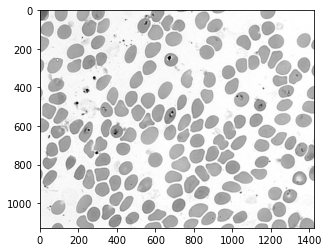

In [3]:
img = cv2.imread("bloodcells.jpg", 0)
plt.figure()
plt.imshow(img, cmap='gray')

plt.show()

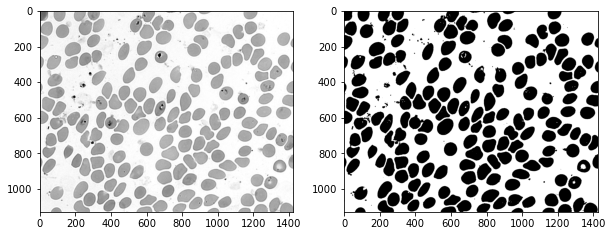

In [4]:
img_tres = img > 200

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_tres, cmap='gray')
plt.show()

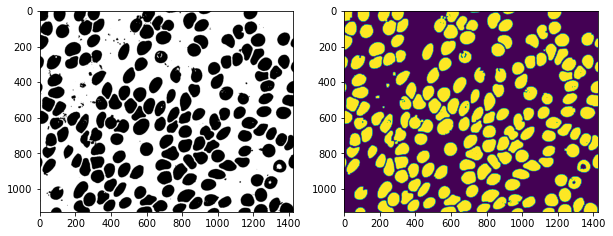

In [63]:
img_erode = morphologicalOperator(img_tres.astype(np.uint8),4, 2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_tres, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_erode)
plt.show()

In [51]:

print(img_erode)

[[255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]


In [60]:
def CompareBounds(matrix,x,y):
    max_y=matrix.shape[0]
    max_x=matrix.shape[1]
    if x>=0 and x<max_x and y>=0 and y<max_y:
        return True
    else:
        return False
    
def GetValues(matrix,sx,sy):
    for i in range(0,img.shape[0]):
            for j in range(0,img.shape[1]):
                if matrix[i,j]==255:
                    return [i,j]
                
    return [img.shape[0],img.shape[1]]

def RegionGrowingStack(img):
    cont=0
    stack=deque()
    sx=0
    sy=0
    
    while sy<img.shape[0]:
        sy,sx=GetValues(img,sx,sy)
        #print(sy," ",sx)
        stack.append([sy,sx])
        while stack:
            seedy,seedx=stack.popleft()
            
            if CompareBounds(img,seedx,seedy)==False:
                continue
                
            if img[seedy,seedx]==254:
                continue
            
            img[seedy,seedx]=254
            
            stack.appendleft([seedy+1,seedx])
            stack.appendleft([seedy-1,seedx])
            stack.appendleft([seedy,seedx+1])
            stack.appendleft([seedy,seedx-1])
            
            stack.appendleft([seedy+1,seedx+1])
            stack.appendleft([seedy-1,seedx-1])
            stack.appendleft([seedy-1,seedx+1])
            stack.appendleft([seedy+1,seedx-1])
            
           
        cont+=1
        if cont>1300:
            break

    return cont

In [62]:
aux=img_erode
print(RegionGrowingStack(aux))

179


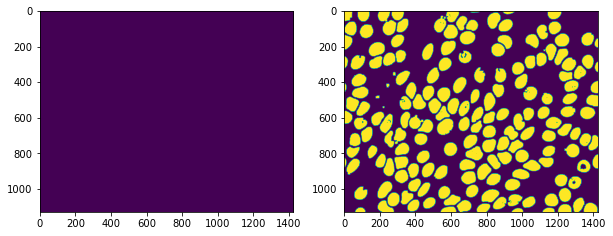

In [64]:
#Comparison of the pricture after the counting process
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(aux)
plt.subplot(1,2,2)
plt.imshow(img_erode)
plt.show()

# Rafael Andrade , José Luis Lobera, José Miguel de la Mora

# The count was 179 individual cells